<a href="https://colab.research.google.com/github/PriyanshuChaubey/creditwise-ml-loan-classification/blob/main/credit_wise_loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [3]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,0
Applicant_ID,50
Applicant_Income,50
Coapplicant_Income,50
Employment_Status,50
Age,50
Marital_Status,50
Dependents,50
Credit_Score,50
Existing_Loans,50
DTI_Ratio,50


Handle Missing Values

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

In [7]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [8]:
cat_imp = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [9]:
df.head()
df.isnull().sum()

,0
Applicant_ID,0
Applicant_Income,0
Coapplicant_Income,0
Employment_Status,0
Age,0
Marital_Status,0
Dependents,0
Credit_Score,0
Existing_Loans,0
DTI_Ratio,0


Exploratory Data Analysis (EDA)

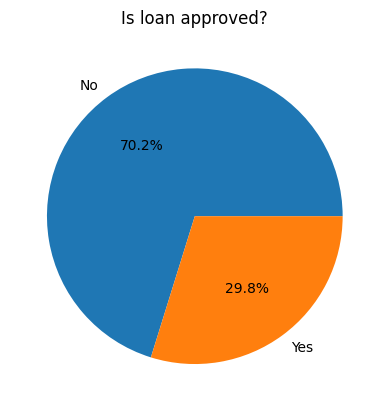

In [12]:
classes_counts = df["Loan_Approved"].value_counts()
plt.pie(classes_counts,labels=['No','Yes'], autopct="%1.1f%%")
plt.title("Is loan approved?")
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Count'>

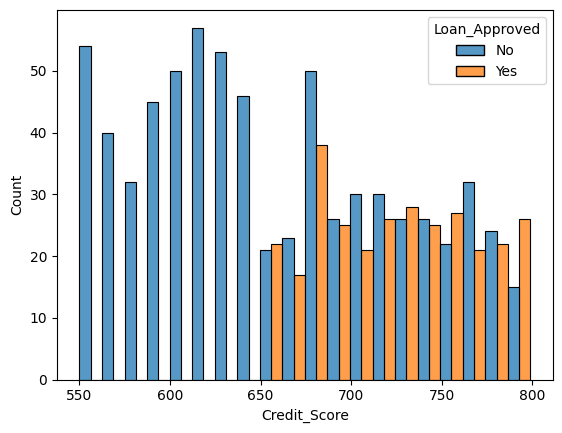

In [21]:
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple='dodge'
)

/tmp/ipython-input-1474815881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], data=df, x='Loan_Approved', y='Applicant_Income', palette='viridis', legend=False)
/tmp/ipython-input-1474815881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], data=df, x='Loan_Approved', y='Credit_Score', palette='viridis', legend=False)
/tmp/ipython-input-1474815881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], data=df, x='Loan_Approved', y='DTI_Ratio', palette='viridis', legend=False)
/tmp/ipython-input-14

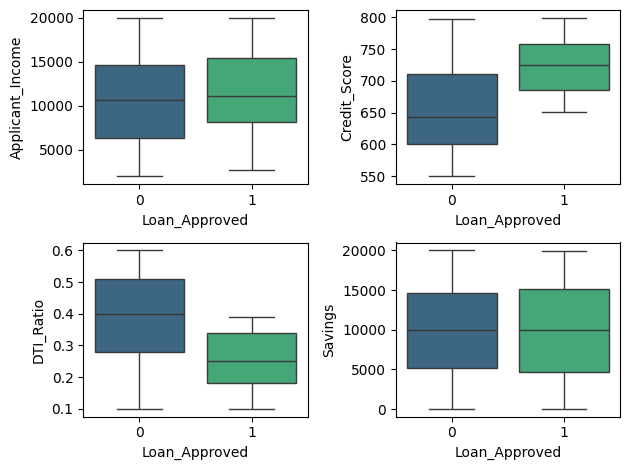

In [65]:
fig, axes = plt.subplots(2,2)
sns.boxplot(ax=axes[0,0], data=df, x='Loan_Approved', y='Applicant_Income', palette='viridis', legend=False)
sns.boxplot(ax=axes[0,1], data=df, x='Loan_Approved', y='Credit_Score', palette='viridis', legend=False)
sns.boxplot(ax=axes[1,0], data=df, x='Loan_Approved', y='DTI_Ratio', palette='viridis', legend=False)
sns.boxplot(ax=axes[1,1], data=df, x='Loan_Approved', y='Savings', palette='viridis', legend=False)
plt.tight_layout()

In [22]:
# Remove Applicant_ID column
df = df.drop("Applicant_ID", axis=1)
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
df["Education_Level"] = le.fit_transform(df["Education_Level"])

df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [30]:
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoder = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoder, columns=ohe.get_feature_names_out(cols), index=df.index)
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [31]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Loan_Approved,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


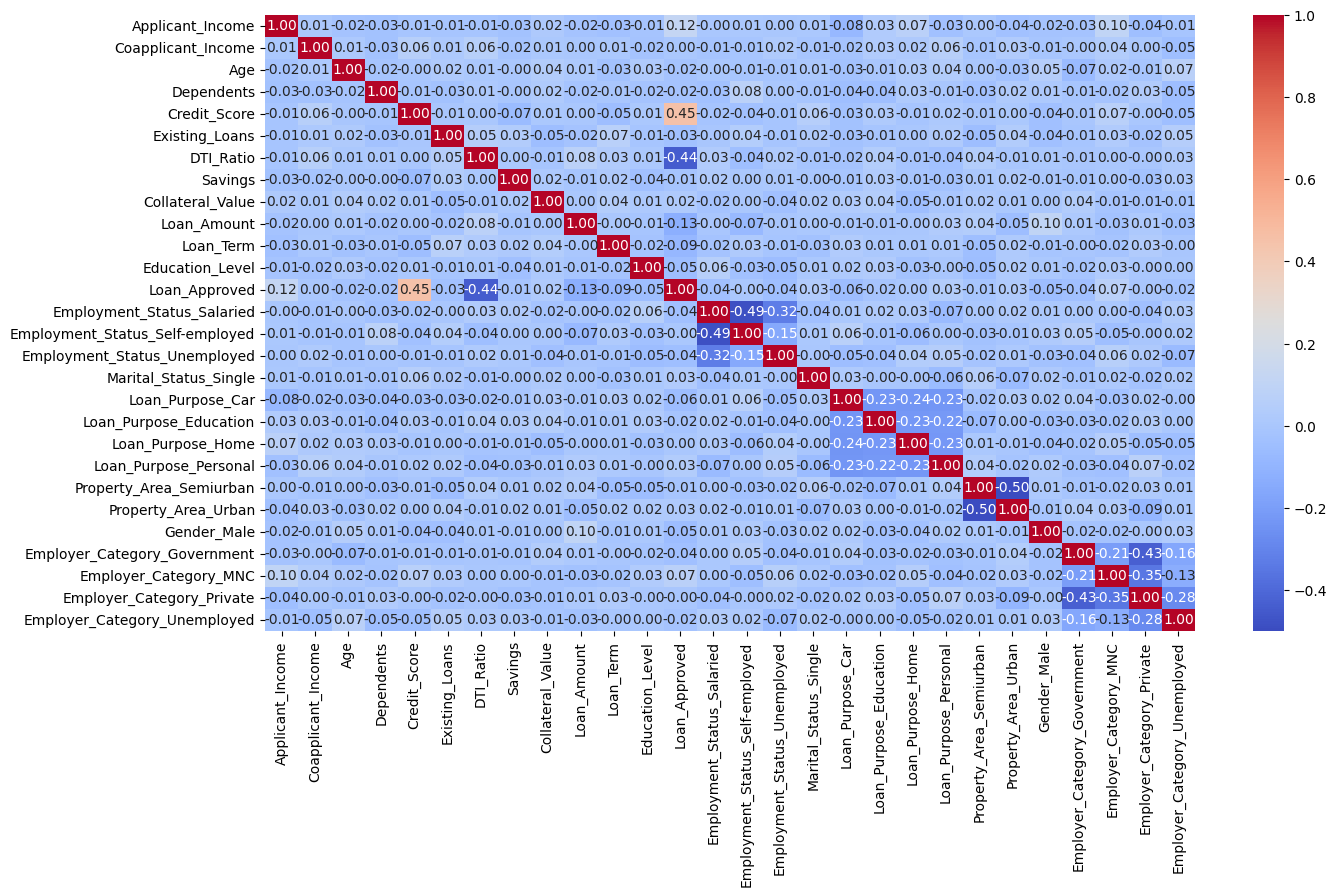

In [51]:
# Correlation Heatmap
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap="coolwarm")
plt.show()

In [33]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

,Loan_Approved
Loan_Approved,1.000000
Credit_Score,0.451175
Applicant_Income,0.119796
Employer_Category_MNC,0.069049
Loan_Purpose_Personal,0.034043
Marital_Status_Single,0.030182
Property_Area_Urban,0.025963
Collateral_Value,0.021868
Coapplicant_Income,0.004230
Loan_Purpose_Home,0.002118


Feature Scaling

In [39]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train & Evaluate Model

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.865
Precision Score: 0.7833333333333333
Recall Score: 0.7704918032786885
F1 Score: 0.7768595041322314
Confusion Matrix: [[126  13]
 [ 14  47]]


In [46]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.76
Precision Score: 0.6274509803921569
Recall Score: 0.5245901639344263
F1 Score: 0.5714285714285714
Confusion Matrix: [[120  19]
 [ 29  32]]


In [50]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.865
Precision Score: 0.8035714285714286
Recall Score: 0.7377049180327869
F1 Score: 0.7692307692307693
Confusion Matrix: [[128  11]
 [ 16  45]]


Feature Engineering

In [52]:
# Add or Tranform features
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [54]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [55]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.62
Recall:  0.5081967213114754
F1 score:  0.5585585585585585
Accuracy:  0.755
CM:  [[120  19]
 [ 30  31]]


In [56]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [69]:
get_ipython().system('pip install gradio')
print("Gradio installation initiated.")

Gradio installation initiated.


In [70]:
def generate_eda_dashboard(df):
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))

    # Pie Chart for Loan_Approved
    classes_counts = df["Loan_Approved"].value_counts()
    axes[0, 0].pie(classes_counts, labels=['No', 'Yes'], autopct="%1.1f%%")
    axes[0, 0].set_title("Is loan approved?")

    # Histogram for Credit_Score by Loan_Approved
    sns.histplot(
        data=df,
        x="Credit_Score",
        hue="Loan_Approved",
        bins=20,
        multiple='dodge',
        ax=axes[0, 1]
    )
    axes[0, 1].set_title("Credit Score Distribution by Loan Approval")

    # Box plots
    sns.boxplot(ax=axes[1, 0], data=df, x='Loan_Approved', y='Applicant_Income', palette='viridis')
    axes[1, 0].set_title('Applicant Income vs. Loan Approved')
    sns.boxplot(ax=axes[1, 1], data=df, x='Loan_Approved', y='Credit_Score', palette='viridis')
    axes[1, 1].set_title('Credit Score vs. Loan Approved')
    sns.boxplot(ax=axes[2, 0], data=df, x='Loan_Approved', y='DTI_Ratio', palette='viridis')
    axes[2, 0].set_title('DTI Ratio vs. Loan Approved')
    sns.boxplot(ax=axes[2, 1], data=df, x='Loan_Approved', y='Savings', palette='viridis')
    axes[2, 1].set_title('Savings vs. Loan Approved')

    plt.tight_layout()
    return fig

print("Function 'generate_eda_dashboard' defined.")

Function 'generate_eda_dashboard' defined.


In [71]:
def generate_correlation_heatmap(df):
    num_cols = df.select_dtypes(include=np.number)
    corr_matrix = num_cols.corr()
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    ax.set_title("Correlation Heatmap of Numerical Features")
    plt.tight_layout()
    return fig

print("Function 'generate_correlation_heatmap' defined.")

Function 'generate_correlation_heatmap' defined.


In [72]:
def generate_confusion_matrices_dashboard():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Logistic Regression Confusion Matrix
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Logistic Regression Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # KNN Confusion Matrix
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('KNN Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    # Naive Bayes Confusion Matrix
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title('Naive Bayes Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('Actual')

    plt.tight_layout()
    return fig

print("Function 'generate_confusion_matrices_dashboard' defined.")

Function 'generate_confusion_matrices_dashboard' defined.


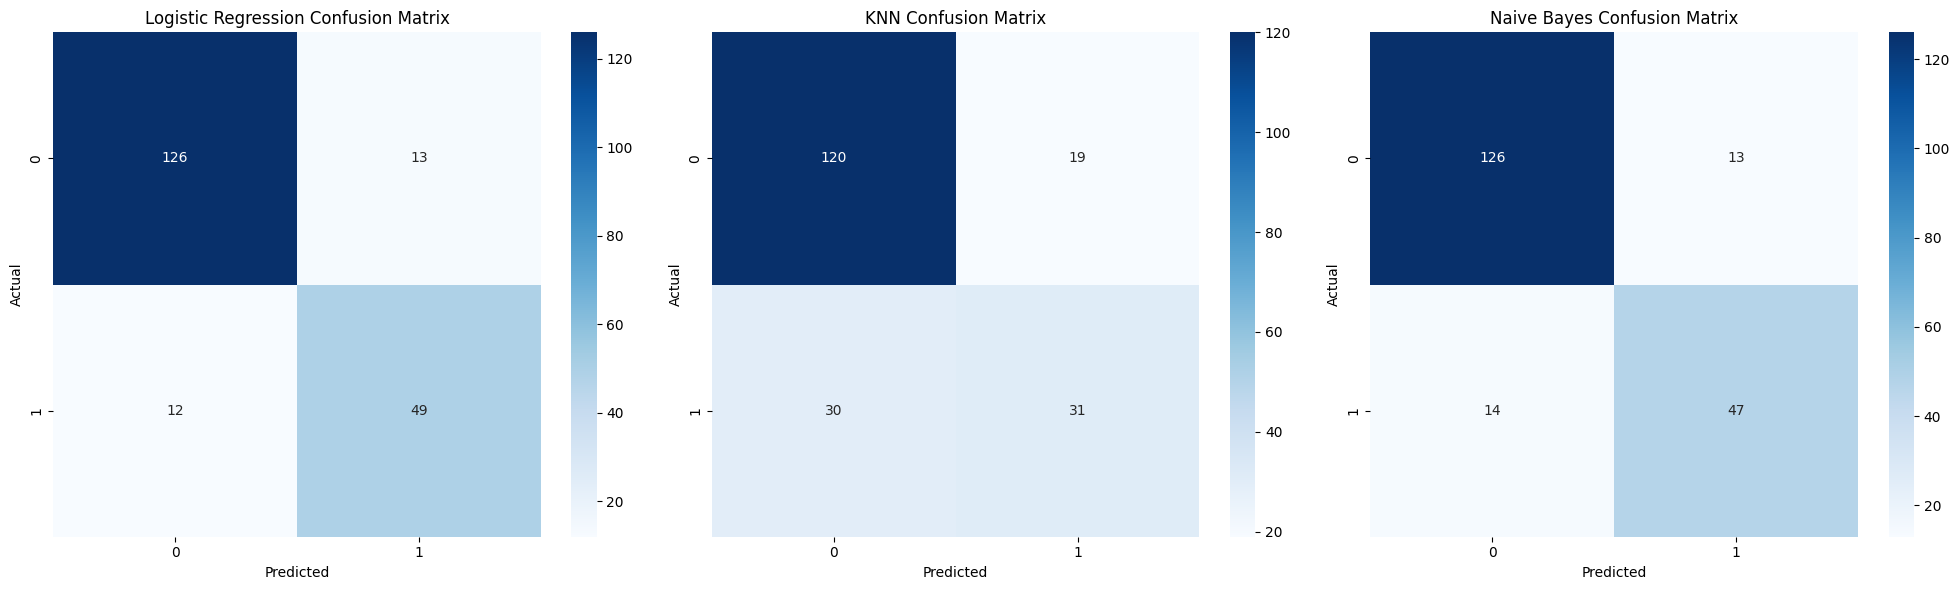

In [73]:
confusion_matrices_fig = generate_confusion_matrices_dashboard()
plt.show()

In [74]:
import gradio as gr
print("Gradio library imported as gr.")

Gradio library imported as gr.


In [76]:
eda_interface = gr.Interface(fn=lambda: generate_eda_dashboard(df), inputs=None, outputs=gr.Plot(), title="EDA Dashboard")
correlation_heatmap_interface = gr.Interface(fn=lambda: generate_correlation_heatmap(df), inputs=None, outputs=gr.Plot(), title="Correlation Heatmap")
confusion_matrices_interface = gr.Interface(fn=generate_confusion_matrices_dashboard, inputs=None, outputs=gr.Plot(), title="Confusion Matrices")

interface = gr.TabbedInterface(
    [eda_interface, correlation_heatmap_interface, confusion_matrices_interface],
    ["EDA Dashboard", "Correlation Heatmap", "Confusion Matrices"]
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://20b35c628286b097f6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
